# 剪枝处理
1. 预剪枝
	- 预剪枝是指在决策树生成过程中，对每个结点在划分前先进行估计，若当前结点的划分不能带来决策树泛化性能提升，则停止划分并将当前结点标记为叶结点
	- 预剪枝使得决策树的很多分支都没有“展开”试时间开销。但另一方面，有些分支的当前划分虽不能提升泛化性能、甚至可能导致泛化性能暂时下降，但在其基础上进行的后续划分却有可能导致性能显著提高；预剪枝基于“贪心”本质禁止这些分支展开，给预剪枝决策树带来了欠拟含的风险
2. 后剪枝
	- 后剪枝是先从训练集生成一棵完整的决策树，然后自底向上地对非叶结点进行考察，若将该结点对应的子树替换为叶结点能带来决策树泛化性能提升，则将该子树替换为叶结点
	- 后剪枝决策树通常比预剪枝决策树保留了更多的分支。一般情形下，后剪枝决策树的欠拟合风险很小，泛化性能往往优于预剪枝决策树。但后剪枝过程是在生成完全决策树之后进行的，并且要自底向上地对树中的所有非叶结点进行逐一考察，因此其训练时间开销比未剪枝决策树和预剪枝决策树都要大得多

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier


IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

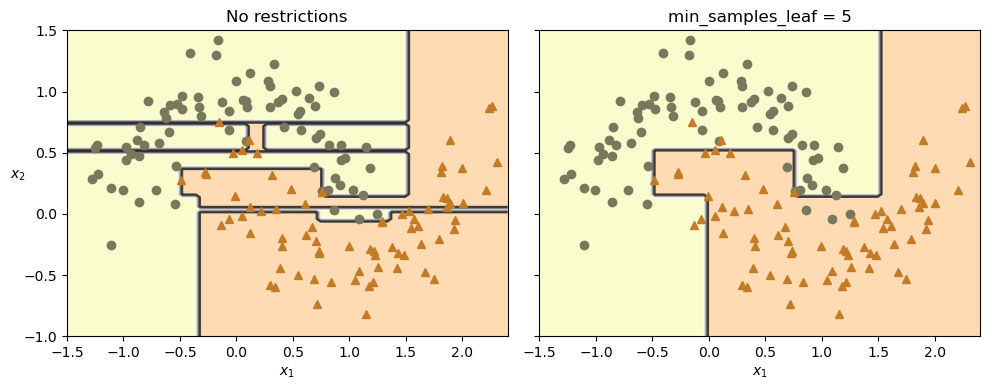

In [2]:
# extra code – this cell generates and saves Figure 6–3

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

In [3]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [4]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

[返回](readme.md)